In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

## Tabla resumen con información a nivel hogar

`VIVIENDA`

In [59]:
file = "../../../data/faostat/FAOSTAT_data_3-8-2019.csv"

In [60]:
df = pd.read_csv(file, encoding='latin')

In [11]:
df.shape

(34416, 14)

In [12]:
df_copy = df.copy()

In [30]:
l = ["Domain Code", "Domain", "Element", "Area", "Year Code", "Item", "Unit", "Flag", "Flag Description"]

In [31]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [28]:
df_copy["Flag"].nunique()

1

In [33]:
df_copy["Item Code"].nunique()

6

In [34]:
df_copy.rename(columns={"Area Code":"area_code",
                        "Element Code":"element_code",
                        "Item Code":"item_code",
                       "Year":"year",
                        "Value":"value"}, inplace=True)

In [35]:
df_copy.head()

,area_code,element_code,item_code,year,value
0,2,432,2051,2010,116.22
1,2,432,2051,2011,111.08
2,2,432,2051,2012,122.45
3,2,432,2051,2013,119.90
4,2,432,2051,2014,124.13


In [36]:
df_copy.shape

(34416, 5)

In [37]:
#list(df_copy.columns)

In [43]:
df_09 = df_copy.copy()

In [44]:
df_09.fillna(value=-1, inplace=True)

In [45]:
df_09.replace(to_replace=-1, value=np.NaN, inplace=True)

Text(0, 0.5, 'Observaciones')

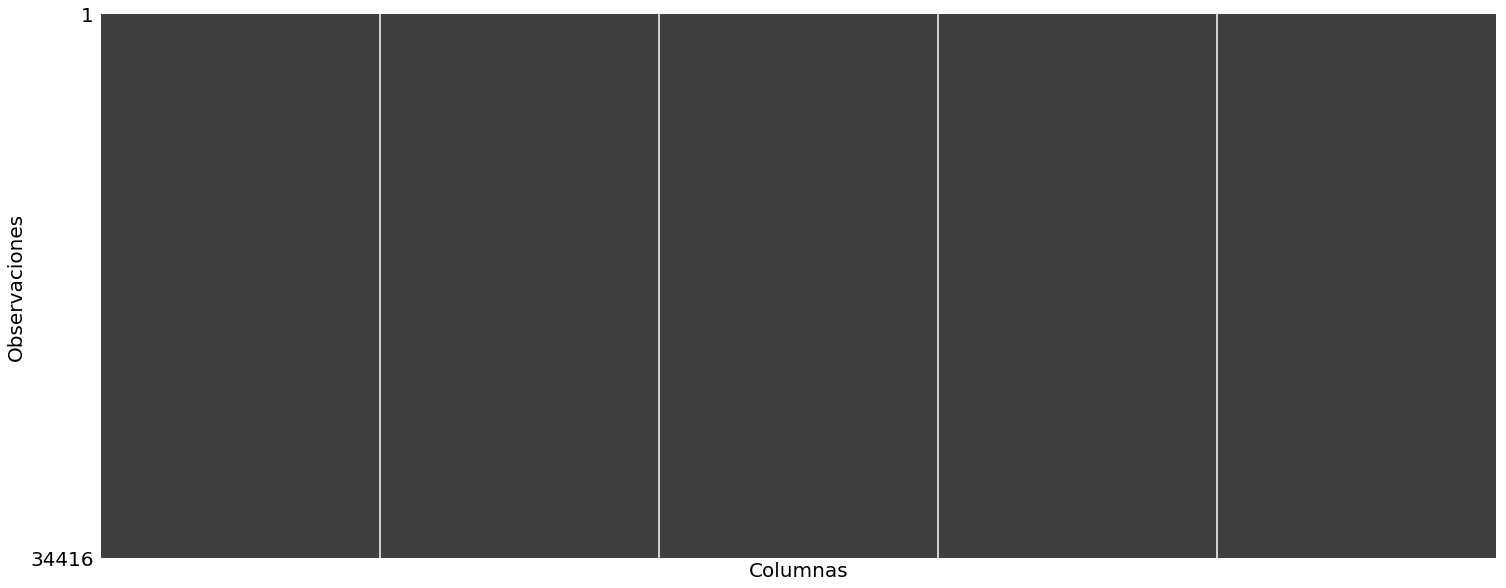

In [46]:
msno.matrix(df_09, fontsize=50, sparkline=False, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

Text(0, 0.5, 'Observaciones')

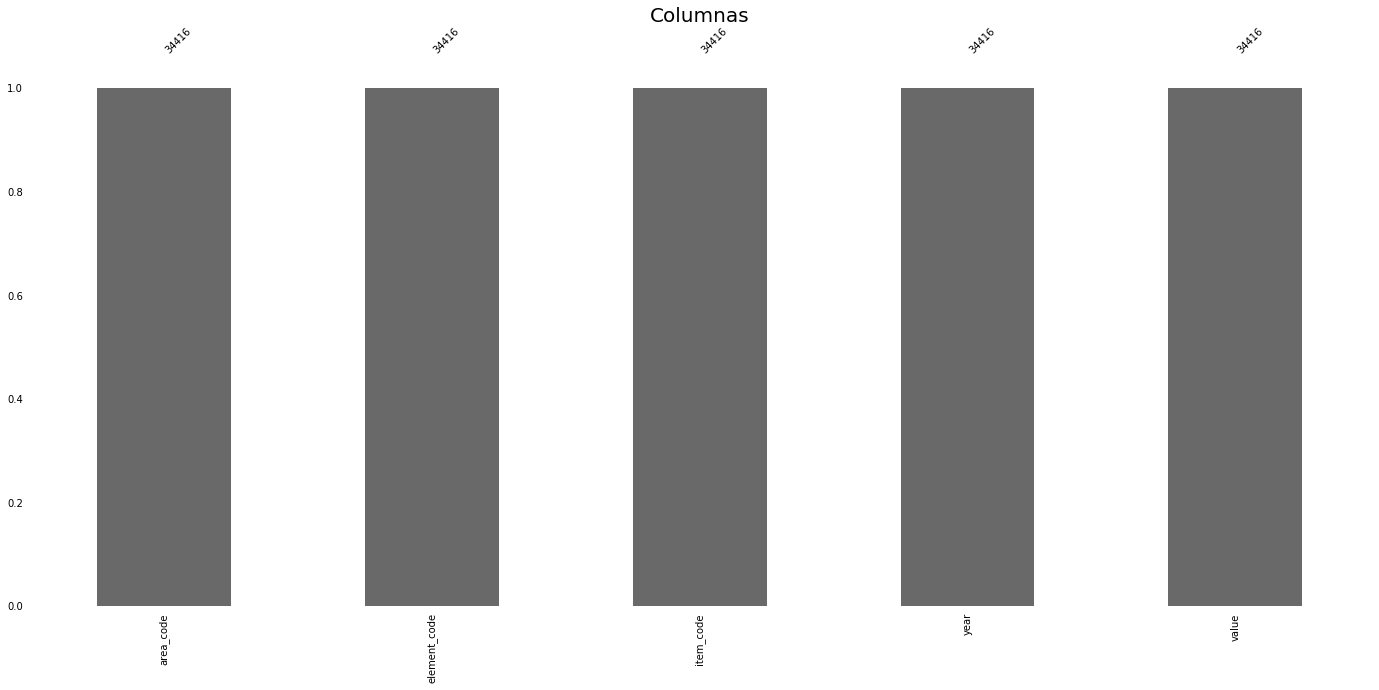

In [47]:
msno.bar(df_09, fontsize=10, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

In [48]:
df_09.replace(to_replace=np.NaN, value=-1, inplace=True)

In [49]:
df_09.columns[df_09.isna().any()].tolist()

[]

In [50]:
threshold = round(df_09.shape[0]*.8)
threshold

27533

In [51]:
l = []
for column in df_09.columns:
    na_column =  df_09[column].value_counts().get(-1)
    if(na_column != None):
        if (df_09.shape[0] - na_column < threshold):
            print(column, ': ', df_09.shape[0] - na_column, ' - ', threshold, 'd e l e t e d')
            l.append(column)

In [52]:
df_09.shape

(34416, 5)

In [53]:
df_09.drop(labels=l, axis=1, inplace=True)

In [54]:
df_09.fillna(value=-1, inplace=True)

In [55]:
df_09.replace(to_replace=-1, value=np.NaN, inplace=True)

Text(0, 0.5, 'Observaciones')

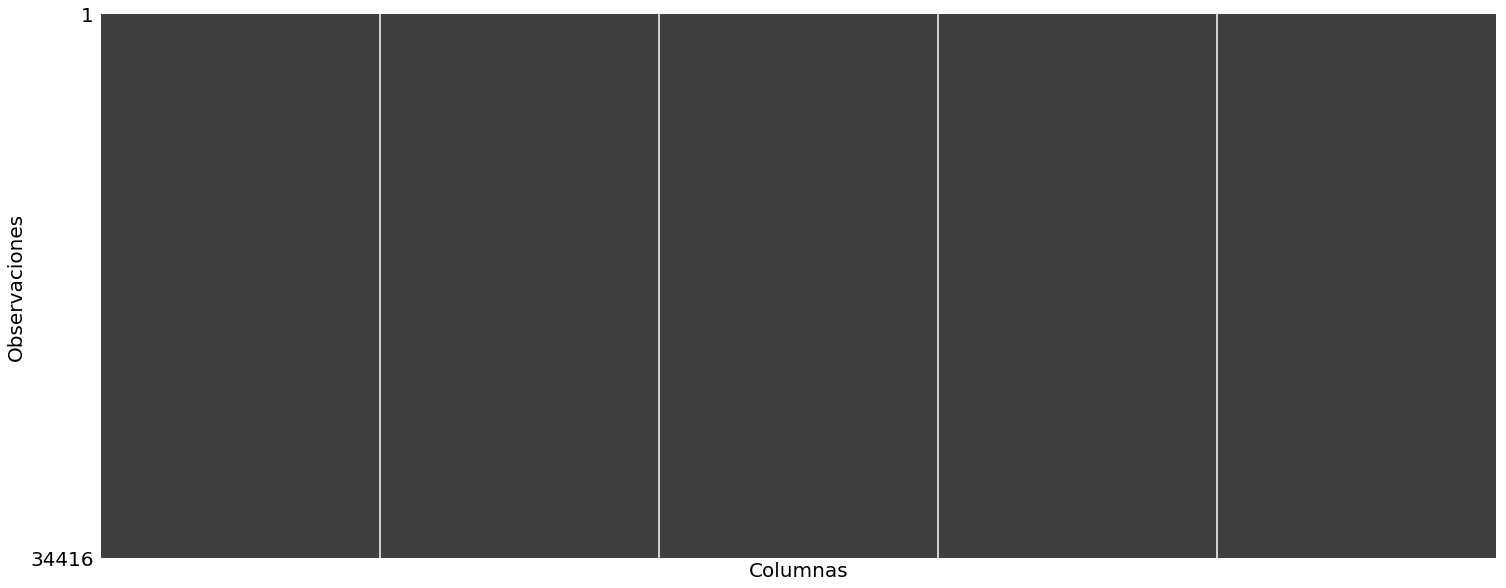

In [56]:
msno.matrix(df_09, fontsize=50, sparkline=False, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

Text(0, 0.5, 'Observaciones')

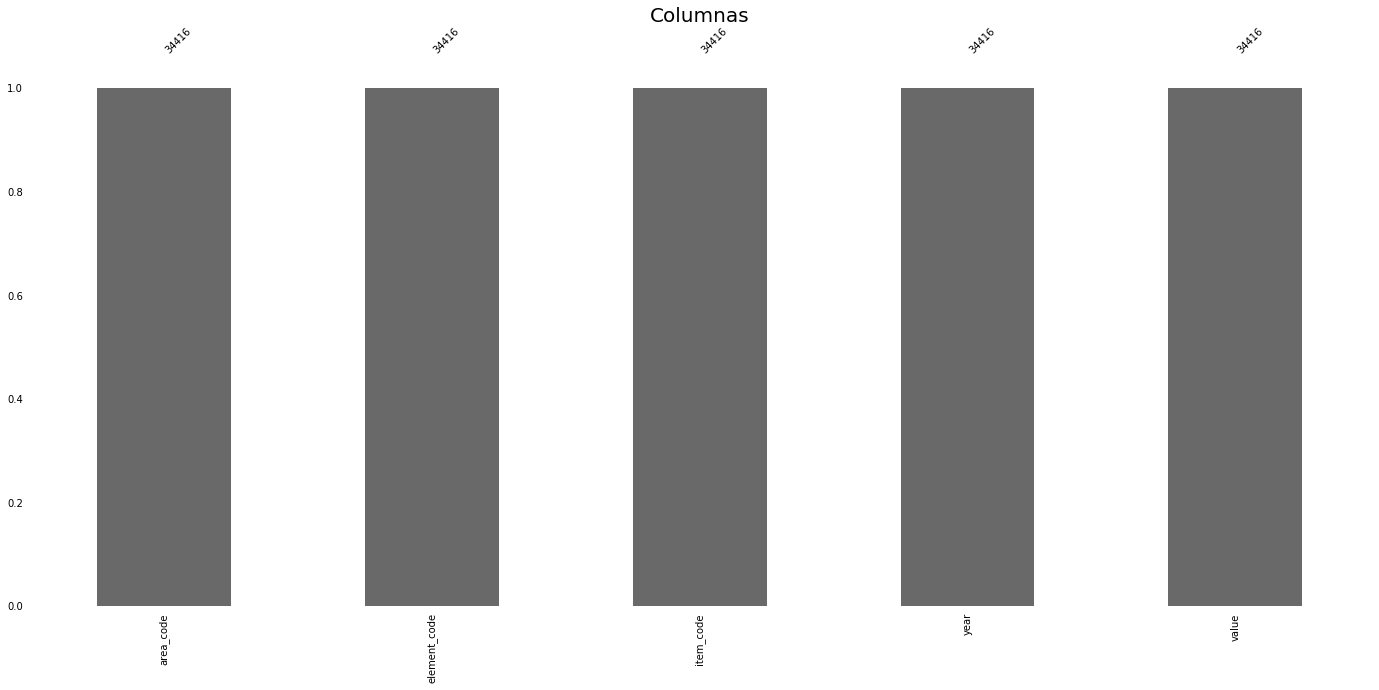

In [57]:
msno.bar(df_09, fontsize=10, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

In [58]:
df_09.head()

,area_code,element_code,item_code,year,value
0,2,432,2051,2010,116.22
1,2,432,2051,2011,111.08
2,2,432,2051,2012,122.45
3,2,432,2051,2013,119.90
4,2,432,2051,2014,124.13


In [61]:
file = "../../../dataframes/faostat/production_indices/production_indices.csv"

In [62]:
df_09.to_csv(file,index = False, header = True, sep = ',', encoding = 'utf-8')